# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
print(df.head())


   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [3]:
print(df.describe())

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


In [5]:
## Functions for later use

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

def bootstrap_replicate_1d(data, func):
    """Generates one replicate."""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Question 1


In [6]:
#Question 1 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from statsmodels.stats import weightstats as stests

sns.set()

_ = plt.hist(df['temperature'], bins=35)
_ = plt.xlabel('temperature')
_ = plt.ylabel('Number of observations')

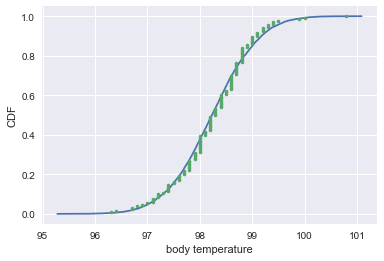

In [7]:
#Question 1 (cont'd)
# Looks to be normally distributed

temp = np.array(df['temperature'])

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp)
sigma = np.std(temp)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor,y_theor = ecdf(samples)
x,y = ecdf(temp)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('body temperature')
_ = plt.ylabel('CDF')
plt.show()

Based on the plot of cumulative distributive function above, temperature is approximately normally distributed

# Question 2

Sample size is large enough to utilize the central limit theorem.
Rule of thumb is sample size is greater than 30.


# Question 3

In [8]:
#Question 3

#Null Hypothesis is mean temperature is 98.6 degrees Fahrenheit
population_temperature_mean = 98.6

# Make an array of translated temperature readings
temp_shifted = temp - np.mean(temp) + population_temperature_mean

# Take bootstrap replicates of translated temperature readings: bs_replicates
bs_replicates = draw_bs_reps(temp_shifted, np.mean, 10000)

# Compute fraction of replicates that are at most the sample mean
p = np.sum(bs_replicates <= np.mean(temp)) / 10000

print('p = ', p)


p =  0.0


Low p-value is evidence against null hypothesis

## Question 3 (cont'd)

 We use the z-statistic for a one-sample test to test the likelihood of mean sample being less than true population mean at 5% significance level.
 
 Null hypothesis is rejected if z <= -1.96 or z >= 1.96.
  
 test statistic (z or t) = (sample mean - null value) / (standard deviation / n^(1/2))


In [9]:
#Manual Calculation
Z = (mu - 98.6) / (sigma / np.sqrt(len(temp)))
print ('test-stat: ', Z)

test-stat:  -5.4759252020785585


In [10]:
#Calculation of z-stat using stats package

testResult=stests.ztest(temp, value = 98.6)

print("Z-stat is: " + str(testResult[0]))
print("P-value is " + str(testResult[1]))

Z-stat is: -5.4548232923645195
P-value is 4.9021570141012155e-08


In [11]:
#Calculation of t-stat using stats package

tStatResult = st.ttest_1samp(temp, 98.6)

print("T-stat is: " + str(tStatResult[0]))
print("P-value is " + str(tStatResult[1]))


T-stat is: -5.4548232923645195
P-value is 2.4106320415561276e-07


The P-values are near zero for each test. This means it is extremely improbable that the true population mean of temperature is 98.6 degrees.

# Question 4


In [12]:
#Draw sample size of 10 from original temperature data

sample_temp = np.random.choice(temp, size=10)

Due to a small sample size, the central limit theorem no longer holds. Therefore the t-test should be used.

In [13]:
# Getting t-stat

tStat = st.ttest_1samp(sample_temp, 98.6)
print("T-stat is: " + str(tStat[0]))
print("P-value is: " + str(tStat[1]))


T-stat is: -1.437805752815876
P-value is: 0.18433522942287867


In [14]:
zStat = stests.ztest(sample_temp, value = 98.6)

print("Z-stat is: " + str(zStat[0]))
print("P-value is: " + str(zStat[1]))

Z-stat is: -1.437805752815876
P-value is: 0.15048917663375716


## Question 4 (cont'd)

The p-value is larger for the z-test than the t-test. This indicates the t-test is more stringent (harder to reject the null hypothesis).


## Question 5

We are considering 'abnormal' anything outside of the the 95% confidence interval.

In [15]:
#Bootstrap confidence interval

bs_reps = draw_bs_reps(temp, np.mean, size=10000)
    
print('Bootstrap confidence interval: ', np.percentile(bs_reps, [2.5, 97.5]))

Bootstrap confidence interval:  [98.12384615 98.37461538]


In [16]:
#Frequentist confidence interval (manual):

conf_int = (mu - (1.96 * sigma/np.sqrt(len(temp))), mu + (1.96 * sigma/np.sqrt(len(temp))))

print('Frequentist confidence interval: ', conf_int)

Frequentist confidence interval:  (98.12367980442816, 98.37478173403333)


In [17]:
#Frequentist confidence interval using statistical package

conf_int = stests.zconfint(temp, alpha=0.05)

print('Frequentist confidence interval: ', str(conf_int))

Frequentist confidence interval:  (98.12319642818163, 98.37526511027987)


# Question 6

In order to see whether there is a difference between male and female temperatures, we use the two sample bootstrap hypothesis for difference of means


In [18]:
## Question 6

#Select male temperatures
male = np.array(df[df.gender == 'M']['temperature'])
female = np.array(df[df.gender == 'F']['temperature'])

observed_difference = np.mean(female) - np.mean(male)

print('Observed difference in average temperatures: ', observed_difference)

Observed difference in average temperatures:  0.2892307692307696


In [19]:
#two sample z-test using 'datacamp bootcamp method'

# Generate shifted arrays
# we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are equal

male_shifted = male - np.mean(male) + mu        # where mu is average over entire sample
female_shifted = female - np.mean(female) + mu

# Compute 10,000 bootstrap replicates from shifted arrays

bs_replicates_male = draw_bs_reps(male_shifted, np.mean, 10000)
bs_replicates_female = draw_bs_reps(female_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates

bs_replications = bs_replicates_female - bs_replicates_male

# Compute and print p-value: p

p = np.sum(bs_replications > observed_difference) / len(bs_replications)
print('p-value =', p)

p-value = 0.0105


In [20]:
#two sample z-test using stats package

two_sample_test = stests.ztest(female, male)

print("Z-stat is: " + str(two_sample_test[0]))
print("P-value is: " + str(two_sample_test[1]))

Z-stat is: 2.2854345381656103
P-value is: 0.02228736076065755


Low p-value above indicates the observed difference between mean female and male temperatures 
is unlikeley to have occurred by chance.